# Life log

In [162]:
import serial
from matplotlib import pyplot as plt
import numpy as np

%run ../oscilloscope/script/dataset.py
%matplotlib inline

DATASET_FOLDER = '../dataset/data_my_home'
NUM_INFERENCES = 30
PORT = 'COM15'
BAUDRATE = 460800
WEIGHT = [1,5,1,2,1,1,1,1,1,1,2,1,3,1]

In [163]:
ds = DataSet(DATASET_FOLDER)
train_data, train_labels, test_data, test_labels = ds.generate(update=False)['mfsc']
num_classes = len(ds.class_labels)
ds.class_labels, num_classes

(['chat',
  'reading',
  'watching_tv',
  'cocking',
  'hamster',
  'silence',
  'vacuum_cleaner',
  'shower',
  'washing_machine',
  'doing_the_dishes',
  'walking',
  'piano',
  'stairs',
  'snack'],
 14)

In [164]:
lines = []
activities = []
with  serial.Serial(PORT, BAUDRATE) as ser:
    for _ in range(NUM_INFERENCES):
        line = ser.readline().decode('ascii').rstrip().split(',')
        print(line)
        seq = int(line[0])
        class_ = line[1]
        class_moving_average = line[2]
        inference = line[2:]
        lines.append(inference)
        activities.append((int)(line[1]))
lines = np.array(lines, dtype=float)/1000.0
lines = lines.T
#lines, activities

['5', '5', '0', '0', '0', '0', '0', '999', '0', '0', '0', '0', '0', '0', '0', '0']
['5', '5', '0', '0', '0', '0', '0', '999', '0', '0', '0', '0', '0', '0', '0', '0']
['4', '5', '0', '479', '0', '0', '520', '0', '0', '0', '0', '0', '0', '0', '0', '0']
['4', '5', '0', '96', '0', '3', '811', '1', '0', '0', '0', '0', '87', '0', '0', '0']
['10', '5', '0', '201', '0', '0', '393', '0', '0', '0', '0', '0', '405', '0', '0', '0']
['10', '4', '0', '164', '0', '0', '167', '0', '0', '0', '0', '0', '667', '0', '0', '0']
['5', '4', '0', '0', '0', '0', '38', '954', '0', '0', '0', '0', '5', '0', '0', '0']
['5', '5', '0', '5', '0', '0', '5', '971', '0', '0', '0', '0', '17', '0', '0', '0']
['5', '5', '0', '0', '0', '0', '0', '999', '0', '0', '0', '0', '0', '0', '0', '0']
['1', '5', '0', '999', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0']
['5', '5', '0', '2', '0', '0', '13', '974', '0', '0', '0', '0', '9', '0', '0', '0']
['4', '5', '0', '3', '0', '3', '766', '220', '0', '0', '0', '0', '5', 

Text(0.5,1,'Activities in my home')

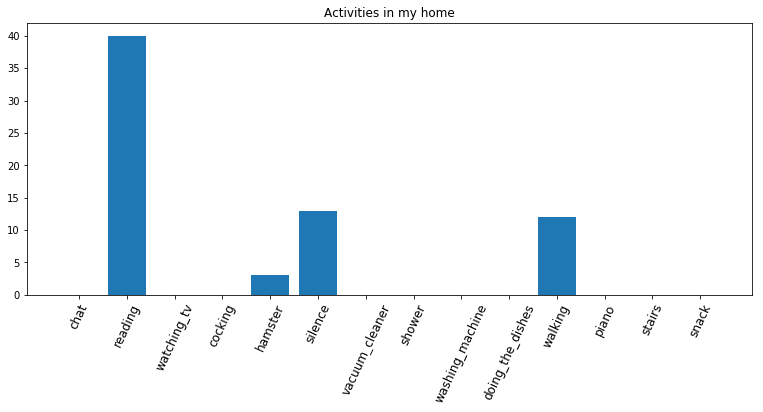

In [165]:
stats = np.zeros(num_classes)
plt.figure(figsize=(13,5))
for a in activities:
    stats[a] += WEIGHT[a]
index = np.arange(num_classes)
plt.xticks(index, ds.class_labels, fontsize=12, rotation=65)
plt.bar(index, stats)
plt.title('Activities in my home')

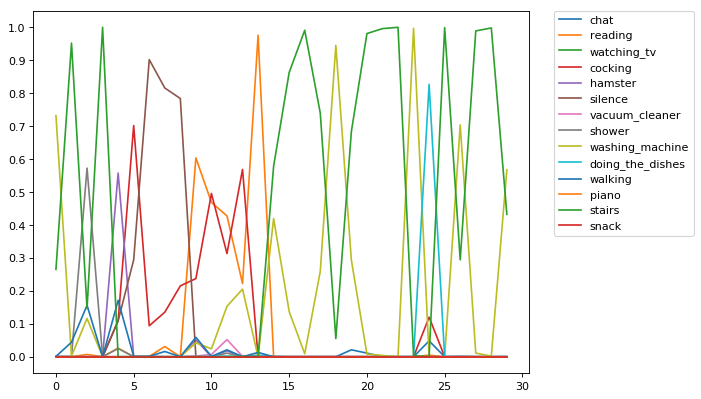

In [148]:
plt.figure(figsize=(8, 6), dpi=80)
yticks = np.linspace(0,1,11)

X = np.arange(NUM_INFERENCES)

for i in range(num_classes):
    plt.plot(X, lines[i], label=ds.class_labels[i])
plt.yticks(yticks)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0, fontsize=10)

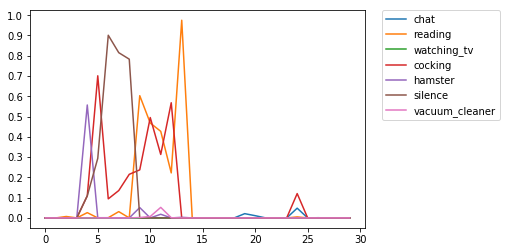

In [149]:
for i in range(int(num_classes/2)):
    plt.plot(X, lines[i], label=ds.class_labels[i])
plt.yticks(yticks)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0, fontsize=10)

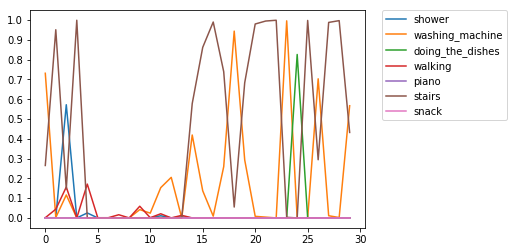

In [150]:
for i in range(int(num_classes/2),num_classes):
    plt.plot(X, lines[i], label=ds.class_labels[i])
plt.yticks(yticks)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0, fontsize=10)